## **5. Clustering (1.0 điểm)**
- Tạo tập tin: question_5.ipynb (toàn bộ code của câu 5 sẽ được viết trong file này)
- Cho dữ liệu clustering.csv
- Yêu cầu: Đọc dữ liệu, chuẩn hóa dữ liệu (nếu cần) và sử dụng KMeans để thực hiện việc phân cụm khách hàng dựa trên cột LoanAmount (đơn vị tính : in Thousands) và cột ApplicantIncome trong dữ liệu được cung cấp..
- Gợi ý các bước thực hiện:
1. Đọc dữ liệu và gán cho biến data.
2. Xem thông tin data: head(), số dòng, số cột, summary.
3. Tiền xử lý dữ liệu (nếu cần).
4. Vẽ hình để xem mối liên hệ giữa LoanAmount và ApplicantIncome. Cho nhận xét
dựa trên biểu đồ.
5. Xây dựng model từ dữ liệu LoanAmount và ApplicantIncome.
6. Tìm kết quả => có bao nhiêu cụm => mẫu nào thuộc cụm nào?
7. Vẽ hình (với mỗi cụm là một màu) => xem kết quả.
8. Đưa ra một số nhận xét dựa trên kết quả.

In [ ]:
# https://drive.google.com/file/d/1X6__gZ28Z1j1WWoW0zWvD025F2teu5NR/view?usp=sharing
system('gdown --id 1X6__gZ28Z1j1WWoW0zWvD025F2teu5NR')

In [ ]:
install.packages('e1071')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
install.packages('factoextra')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Rcpp’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
library(tidyverse)
library(data.table)
library(dplyr)
library(purrr)
library(ggplot2)
library(e1071)
library(cluster)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
data = read.csv('clustering.csv')

In [ ]:
print(paste('number of rows: ', dim(data)[1]))
print(paste('number of columns: ', dim(data)[2]))

[1] "number of rows:  381"
[1] "number of columns:  13"


In [ ]:
head(data)
tail(data)
summary(data)
str(data)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
5,LP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y
6,LP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
376,LP002943,Male,No,,Graduate,No,2987,0,88,360,0,Semiurban,N
377,LP002953,Male,Yes,3+,Graduate,No,5703,0,128,360,1,Urban,Y
378,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
379,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
380,LP002979,Male,Yes,3+,Graduate,No,4106,0,40,180,1,Rural,Y
381,LP002990,Female,No,0,Graduate,Yes,4583,0,133,360,0,Semiurban,N


   Loan_ID             Gender            Married           Dependents       
 Length:381         Length:381         Length:381         Length:381        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
  Education         Self_Employed      ApplicantIncome CoapplicantIncome
 Length:381         Length:381         Min.   : 150    Min.   :    0    
 Class :character   Class :character   1st Qu.:2600    1st Qu.:    0    
 Mode  :character   Mode  :character   Median :3333    Median :  983    
                                       Mean   :3580    Mean   : 1277    
                   

'data.frame':	381 obs. of  13 variables:
 $ Loan_ID          : chr  "LP001003" "LP001005" "LP001006" "LP001008" ...
 $ Gender           : chr  "Male" "Male" "Male" "Male" ...
 $ Married          : chr  "Yes" "Yes" "Yes" "No" ...
 $ Dependents       : chr  "1" "0" "0" "0" ...
 $ Education        : chr  "Graduate" "Graduate" "Not Graduate" "Graduate" ...
 $ Self_Employed    : chr  "No" "Yes" "No" "No" ...
 $ ApplicantIncome  : int  4583 3000 2583 6000 2333 3200 2500 1853 1299 4950 ...
 $ CoapplicantIncome: num  1508 0 2358 0 1516 ...
 $ LoanAmount       : num  128 66 120 141 95 70 109 114 17 125 ...
 $ Loan_Amount_Term : num  360 360 360 360 360 360 360 360 120 360 ...
 $ Credit_History   : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Property_Area    : chr  "Rural" "Urban" "Urban" "Urban" ...
 $ Loan_Status      : chr  "N" "Y" "Y" "Y" ...


In [ ]:
# phân cụm khách hàng dựa trên cột LoanAmount (đơn vị tính : in Thousands) và cột ApplicantIncome trong dữ liệu được cung cấp
df = subset(data, select = c('LoanAmount', 'ApplicantIncome'))

In [ ]:
head(df)

,LoanAmount,ApplicantIncome
,<dbl>,<int>
1,128,4583
2,66,3000
3,120,2583
4,141,6000
5,95,2333
6,70,3200


<font color = 'red'>**Nhận xét:**</font>
- input: LoanAmount, ApplicantIncome
- LoanAmount, ApplicantIncome: là 2 biến continuous

In [ ]:
continuous_variables_analysis = function(dataset){
    # summarise_all(dataset, ~ sum(is.na(.)))
    count_missing = sapply(dataset, function(y) sum(length(which(is.na(y)))))
    df_count_missing = arrange(filter(data.frame(count_missing), count_missing > 0), desc(count_missing))
    df_count_missing$missing_percents = round(df_count_missing$count_missing / dim(df)[1], 4) * 100
    print(df_count_missing)

    len = length(dataset)
    par(mfrow=c(1, len))
    for (i in 1:len){
        boxplot(dataset[i], main=names(dataset[i])) 
    }

    for (i in 1:len){
        outliers_feature = boxplot.stats(unlist(dataset[i]))$out
        if (length(outliers_feature) > 0)
            print(paste(names(dataset[i]), 'có', length(outliers_feature), 'là: ', outliers_feature))
        else
            print(paste(names(dataset[i]), 'có', length(outliers_feature), 'outliers'))
    }
}

[1] count_missing    missing_percents
<0 rows> (or 0-length row.names)


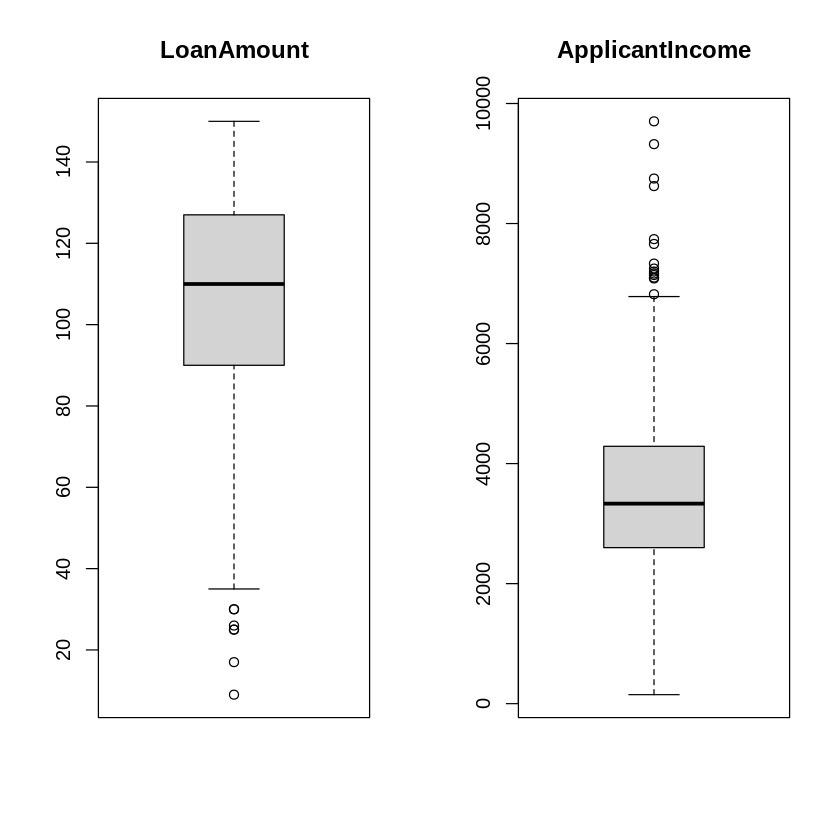

In [ ]:
continuous_variables_analysis(df)

In [ ]:
# cả LoanAmount, ApplicantIncome đều có outliers

In [ ]:
continuous_variables_detailed_analysis = function(dataset, f){
    print(summary(f))
    # print(paste('median = ', median(f)))
    print(paste('var = ', var(f)))

    skew = skewness(f)
    kur = kurtosis(f)
    print(paste("Skew: ", skew))

    if (skew > 0)
        print("Phân phối lệch phải")
    else if (skew == 0)
        print("Phân phối đối xứng")
    else
        print("Phân phối lệch trái")

    print(paste("Kurtosis: ", kur))
    if (kur > 0)
        print("Phân phối nhọn hơn pp chuẩn")
    else if (kur == 0)
        print("Phân phối đối xứng")
    else
        print("Phân phối bẹt hơn pp chuẩn")

    p1 = hist(f, col = "#f7a34c", main = names(f)) 
    p1

    p = ggplot(dataset, aes(f))
    p2 = p + geom_histogram(aes(y=..density..), bins = 10, color = "white", fill = '#1e81b0') +
    ggtitle(names(f)) + theme_bw(base_size = 12) + geom_density(col='red')
    p2
}

[1] "LoanAmount"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      9      90     110     105     127     150 
[1] "var =  804.202458903163"
[1] "Skew:  -0.797960566630858"
[1] "Phân phối lệch trái"
[1] "Kurtosis:  0.188567213942844"
[1] "Phân phối nhọn hơn pp chuẩn"


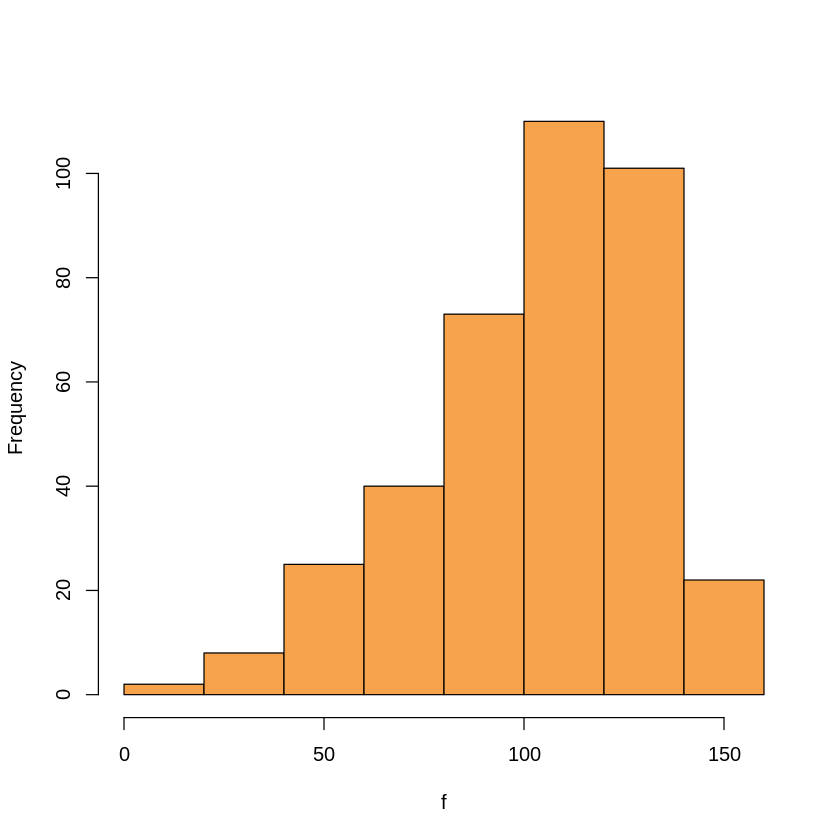

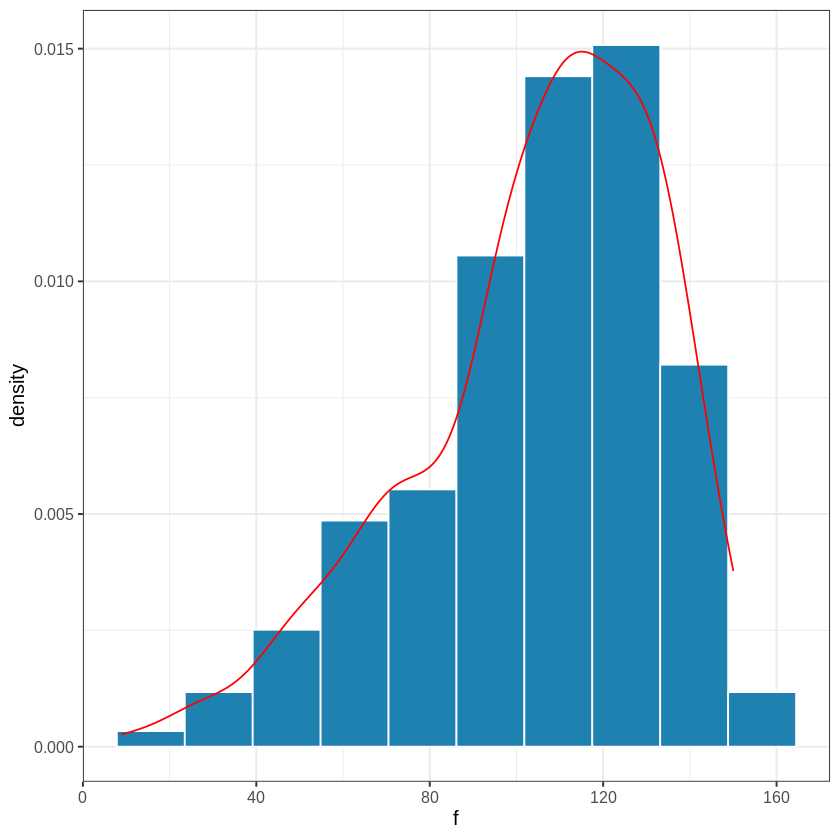

In [ ]:
print('LoanAmount')
continuous_variables_detailed_analysis(df, df$LoanAmount)

[1] "ApplicantIncome"
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    150    2600    3333    3580    4288    9703 
[1] "var =  2015871.2785882"
[1] "Skew:  1.11094984000642"
[1] "Phân phối lệch phải"
[1] "Kurtosis:  1.99445527255935"
[1] "Phân phối nhọn hơn pp chuẩn"


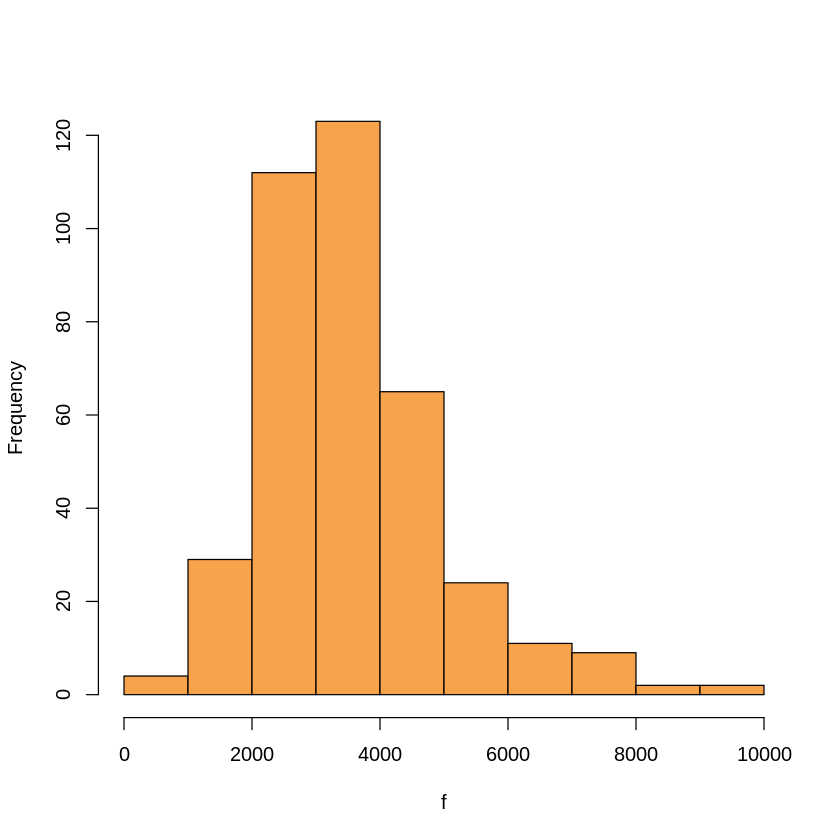

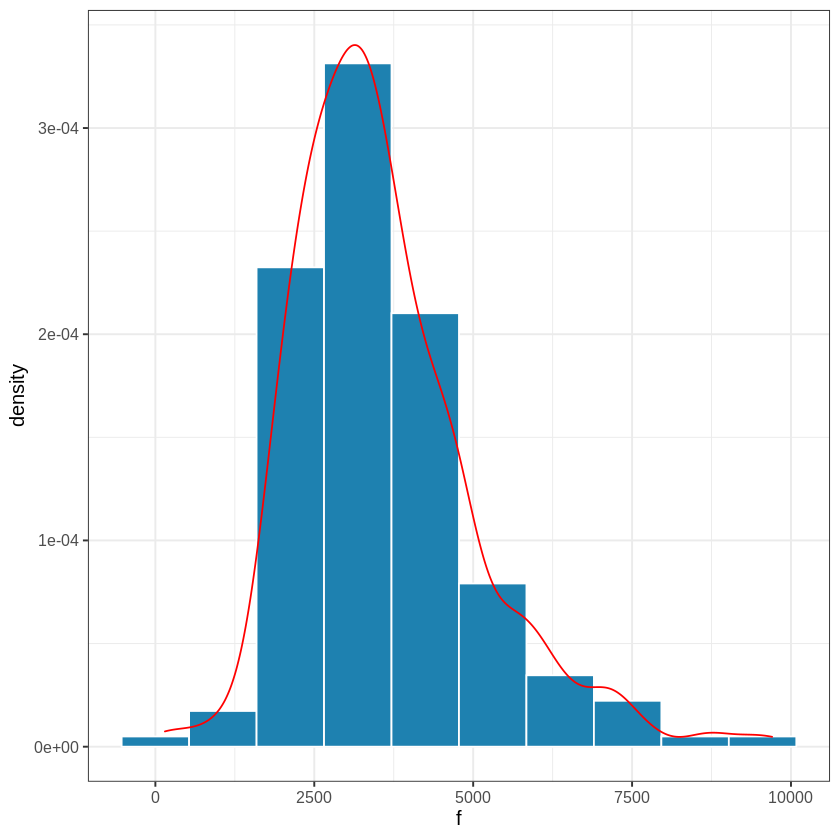

In [ ]:
print('ApplicantIncome')
continuous_variables_detailed_analysis(df, df$ApplicantIncome)

In [ ]:
# Vì kmeans có thể phân cụm ko tốt khi dataset có outliers =>drop outliers
LoanAmount_outliers = boxplot.stats(df$LoanAmount)$out
ApplicantIncome_outliers = boxplot.stats(df$ApplicantIncome)$out

df_new = df[!(df$LoanAmount %in% LoanAmount_outliers),]
df_new = df[!(df$ApplicantIncome %in% ApplicantIncome_outliers),]

[1] 0.2706815


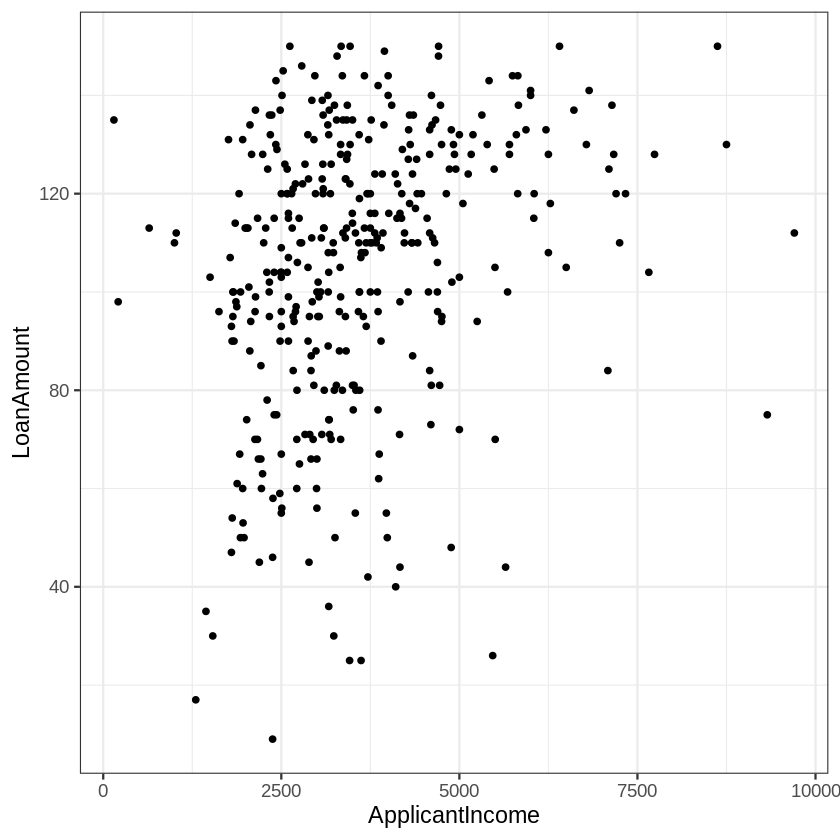

In [ ]:
plot <- ggplot(data = df, aes(x = ApplicantIncome, y = LoanAmount)) +
        geom_point() +
        theme_bw(base_size = 14)
plot

print(cor(df$ApplicantIncome, df$LoanAmount))

LoanAmount và ApplicantIncome không tương quan với nhau

In [ ]:
res = get_clust_tendency(df, n=nrow(df)-1, graph = TRUE)
res$hopkins_stat

[1] 0.7734349

In [ ]:
# => df có khả năng phân cụm

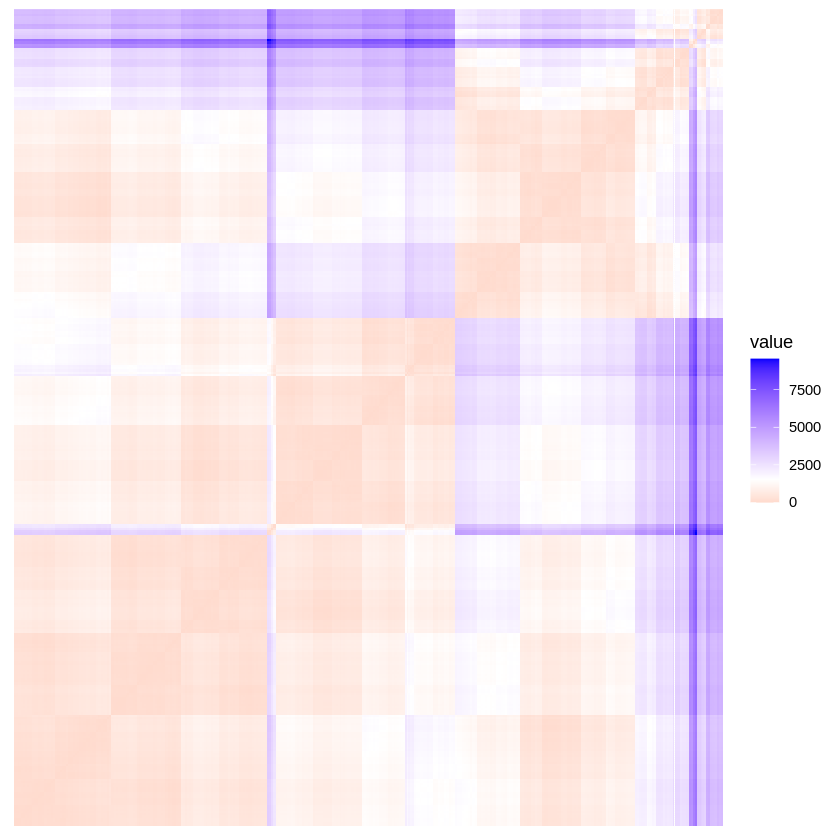

In [ ]:
res$plot

In [ ]:
# nhìn trực quan thì có cảm giác phân thành 2 hoặc 3 cụm

In [ ]:
wss = (nrow(df) -1) * sum(apply(df, 2, var))
wss

[1] 766336683

[1] 766336683 291148681 151285949  93198688  65202494  46936662


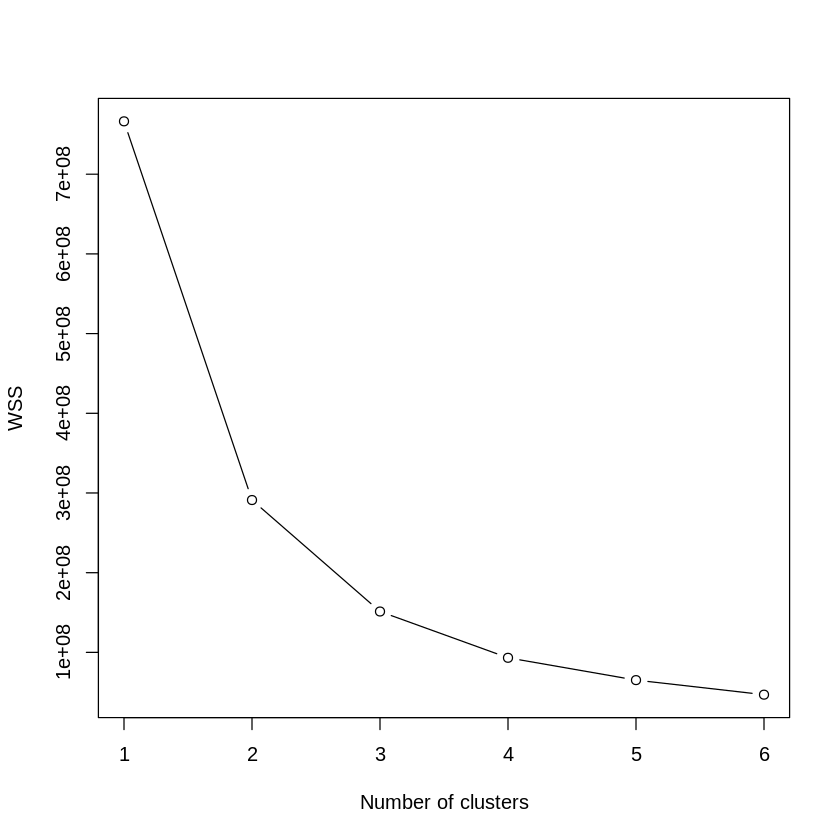

In [ ]:
# chọn k phù hợp
for (i in 1:6) wss[i] = sum(kmeans(df,
                        centers = i,
                        nstart = 20)$withinss
)
print(wss)

plot(1:6, wss, type = 'b', xlab='Number of clusters', ylab='WSS')

In [ ]:
# chọn k = 3 là hợp lý do từ 4 trở đi, giá trị wss giảm khá mịn

In [ ]:
set.seed(42)
dfCluster = kmeans(df, centers = 3, nstart=20)
dfCluster

K-means clustering with 3 clusters of sizes 182, 156, 43

Cluster means:
  LoanAmount ApplicantIncome
1   97.47253        2497.973
2  109.75641        4033.596
3  119.48837        6512.767

Clustering vector:
  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  2   1   1   3   1   1   1   1   1   2   2   2   2   1   3   1   2   1   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   2   2   1   2   2   2   1   1   2   2   2   3   3   1   2   1   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   1   1   2   2   1   1   2   1   3   2   1   2   2   2   1   2   2   2   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  2   1   1   2   2   2   1   1   2   1   2   1   3   1   3   1   2   1   2   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   2   1   1   2   2   2   2   2   1   1   1   2   3   1   

In [ ]:
print(dfCluster$centers)

  LoanAmount ApplicantIncome
1   97.47253        2497.973
2  109.75641        4033.596
3  119.48837        6512.767


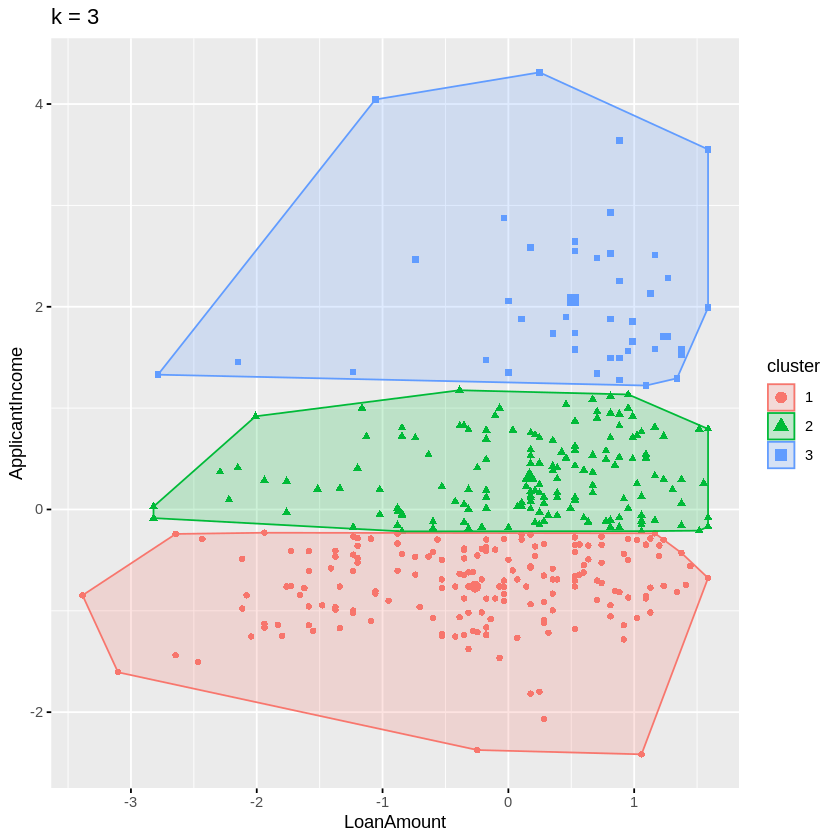

In [ ]:
fviz_cluster(dfCluster, geom = "point", data = df) +
ggtitle("k = 3")

In [ ]:
# nhìn chung thù phân thành 3 cụm khá ổn, tuy nhiên ở cụm 1 và 2 (màu đỏ và màu xanh lá) tại phần giao giữa 2 miền chưa được rõ ràng.

### Prediction

In [ ]:
names(df)

[1] "LoanAmount"      "ApplicantIncome"

In [ ]:
newdata = data.frame( LoanAmount = c(30, 60, 90),  
                      ApplicantIncome = c(20, 55, 80))
newdata

LoanAmount,ApplicantIncome
<dbl>,<dbl>
30,20
60,55
90,80


In [ ]:
predict.kmeans <- function(object, newdata){
    centers <- object$centers
    n_centers <- nrow(centers)
    dist_mat <- as.matrix(dist(rbind(centers, newdata)))
    dist_mat <- dist_mat[-seq(n_centers), seq(n_centers)]
    max.col(-dist_mat)
}

res = predict.kmeans(dfCluster, newdata)
res

[1] 1 1 1